# IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from matplotlib.colors import ListedColormap

# IMPORT DATASET

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# TRAINING/TEST SET SPLIT

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(float))
X_test = sc.transform(X_test.astype(float))

# DECISION TREE CLASSIFICATION FIT ON TRAINING SET

In [5]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# DECISION TREE CLASSIFICATION PREDICTION ON TEST SET

In [6]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]

# CONFUSION MATRIX

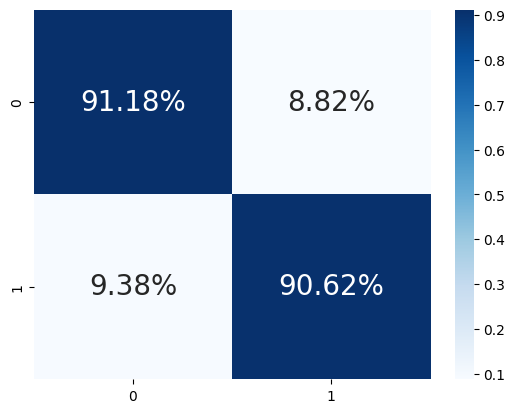

In [7]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
heatmap = sns.heatmap(cm, annot = True, annot_kws={"size": 20}, fmt = ".2%", cmap = plt.cm.Blues)